Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)\
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety\
Разделите данные на выборку для обучения и тестирования\
Постройте модель LDA\
Визуализируйте предсказания для тестовой выборки и центры классов\
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width\
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [30]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [31]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [107]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [61]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [62]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
#Оставить два признака
df = data[['sepal length (cm)', 'sepal width (cm)']]

In [64]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, test_size=0.25)

# строим модель LDA

In [65]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
lda = LinearDiscriminantAnalysis()

In [67]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [68]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1])

In [69]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,2
1,1,1
2,2,2
3,2,2
4,0,0
5,0,0
6,1,2
7,0,0
8,1,2
9,1,1


In [70]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, lda.predict(X_test))

0.6842105263157895

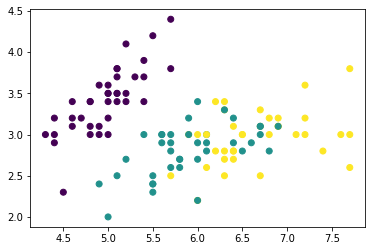

In [108]:
# визуализируем дискриминантную линию
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

# Визуализируйте предсказания для тестовой выборки и центры классов

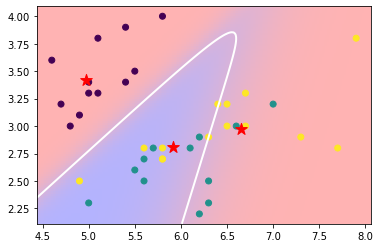

In [83]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

# Выводы:
1. Не понимаю как сделать трехцерную визуализацию )
2. Класс 2 и 3 перемешались, видимо между они не определяются длиной и шириной цветка. На основании данных\
можно определить частично 3 класс по ширине цветка более 7 см.
3. Класс 1 (слева вверху) четко определяется длиной и шириной цветка.

In [100]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.cluster import KMeans

In [88]:
# приведем данные к единому масштабу - хотя это не требуется
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X_scaled = scaler.fit_transform(df)

In [103]:
# подберем кол-во кластеров
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

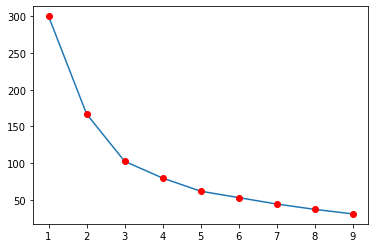

In [104]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

По методу локтя оптимальный диапазон кластеров 3 или 4.\
Зная, что всего 3 разновидности цветка - выбираю 3 кластера.

In [105]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

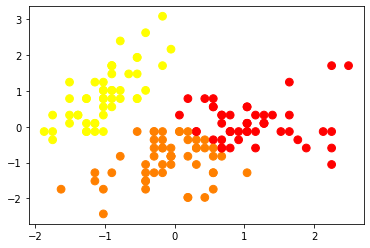

In [106]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

# Выводы:
1. На графике явно видно выделение кластера №1 - явно определяется шириной и длиной цветка.
2. Между кластерами 2 и 3 стала более четкая граница, на основании данного распределния скорей всего определить принадлежность по длине и ширине возможно.
3. Но зная разброс данных 2 и 3 кластера, разделение на кластеры точно ошибочное и делать выводы будет не правильно.
4. Посмотрев описание данных, я бы делал разделение на кластеры по длине и ширине лепестка. Корреляция с классом более 0,9, что достаточно высоко.